**建模就是一次debug** 

In [1]:
import pandas as pd 
data = pd.read_csv("数据\基于用户行为的贷款预测训练集.csv")

In [2]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
data[data.duplicated()].count()
data[data['Id'].duplicated()].count()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

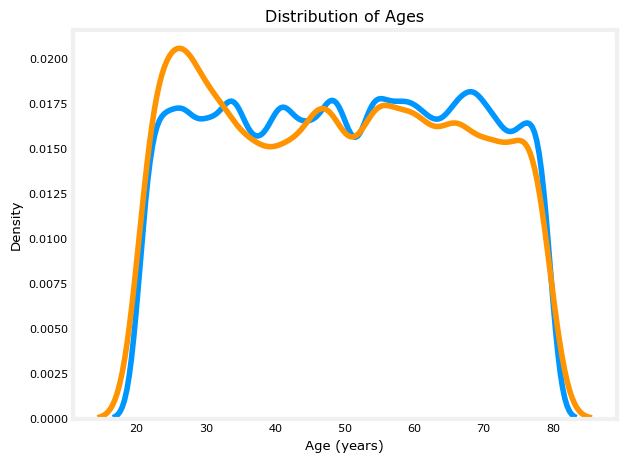

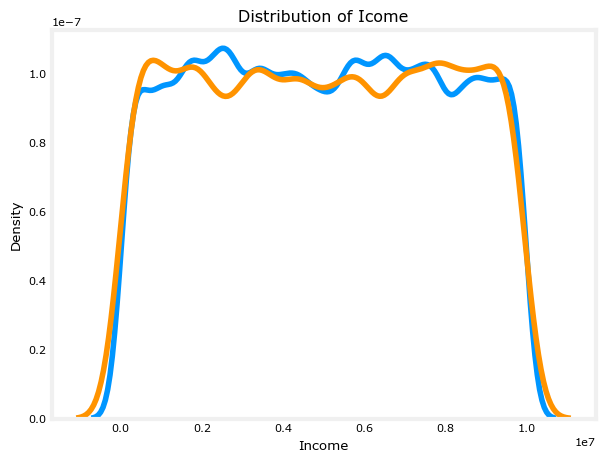

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('./deeplearning.mplstyle')
# 画图代码
def plot_stats(feature, label_rotation=False, horizontal_layout=True):
    temp = data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Number of contracts': temp.values})
    # 计算每个属性类别中Risk_Flag=1的个数
    cat_perc = data[[feature, 'Risk_Flag']].groupby([feature], as_index=False).mean()
    cat_perc.sort_values(by='Risk_Flag', ascending=False, inplace=True)
    if (horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x=feature, y="Number of contracts", data=df1)
    if (label_rotation):
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
    s = sns.barplot(ax=ax2, x=feature, y='Risk_Flag', order=cat_perc[feature], data=cat_perc)
    if (label_rotation):
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.ylabel('Percent of Risk_Flag with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.gcf().subplots_adjust(left=0.05,top=0.91,bottom=0.09)
    plt.show();
 
#1.年龄的影响
# 按时偿还贷款的KDE(kdeplot,核密度估计图)图
sns.kdeplot(data.loc[data['Risk_Flag'] == 0, 'Age'], label='Risk_Flag == 0')
# 没有按时偿还贷款的KDE(kdeplot,核密度估计图)图
sns.kdeplot(data.loc[data['Risk_Flag'] == 1, 'Age'], label='Risk_Flag == 1')
# 标签设置
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.gcf().subplots_adjust(left=0.05, top=0.9, bottom=0.09)

plt.show()
# 按时偿还贷款的KDE(kdeplot,核密度估计图)图
sns.kdeplot(data.loc[data['Risk_Flag'] == 0, 'Income'], label='Risk_Flag == 0')
# 没有按时偿还贷款的KDE(kdeplot,核密度估计图)图
sns.kdeplot(data.loc[data['Risk_Flag'] == 1, 'Income'], label='Risk_Flag == 1')
# 标签设置
plt.xlabel('Income'); plt.ylabel('Density'); plt.title('Distribution of Icome');
plt.gcf().subplots_adjust(left=0.05, top=0.9, bottom=0.09)

plt.show()


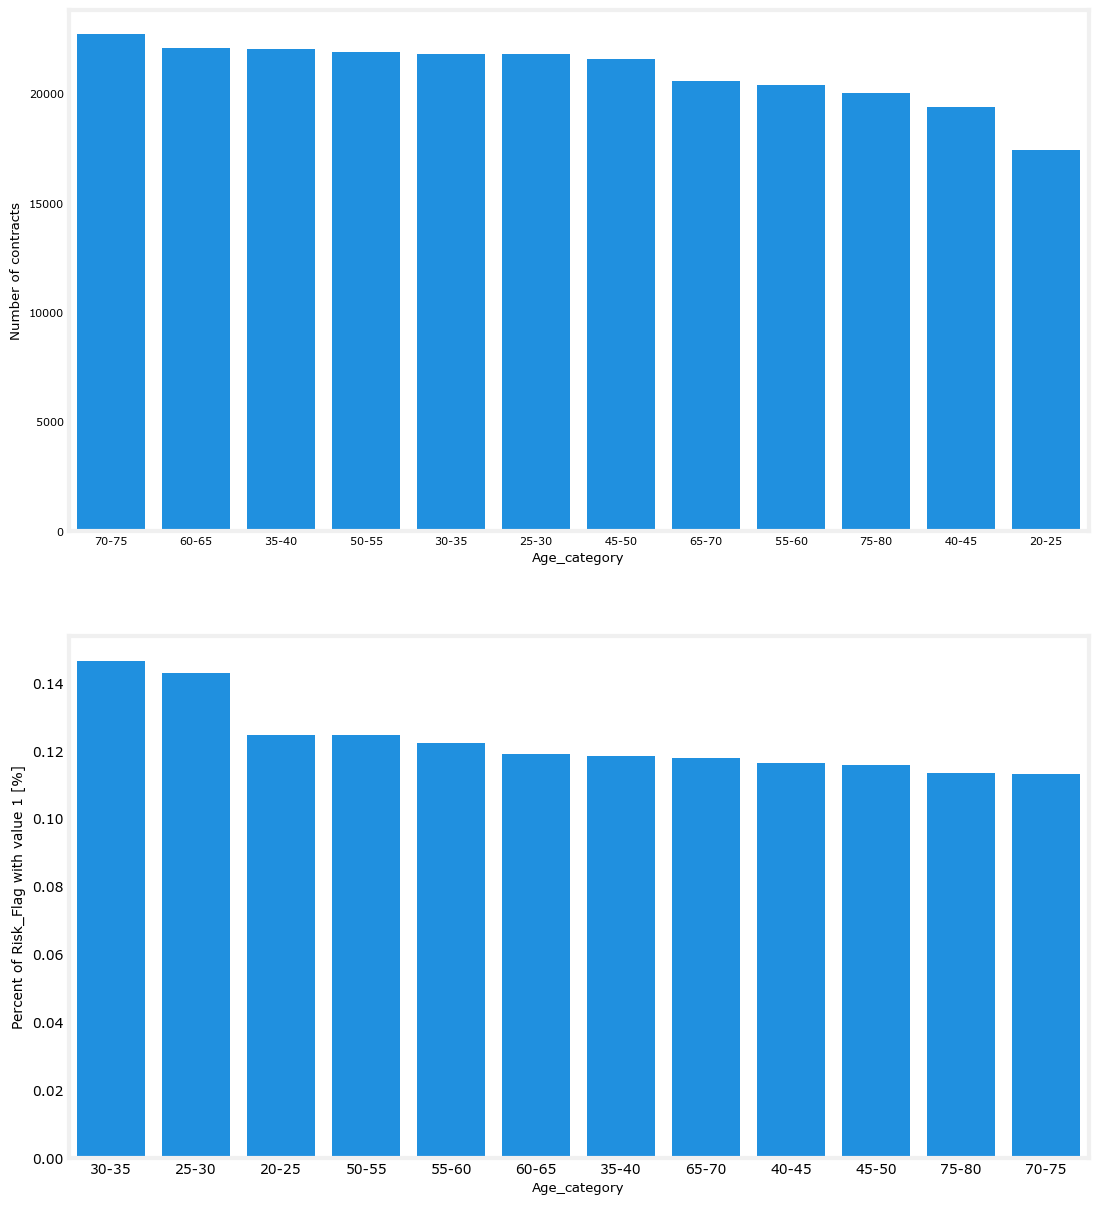

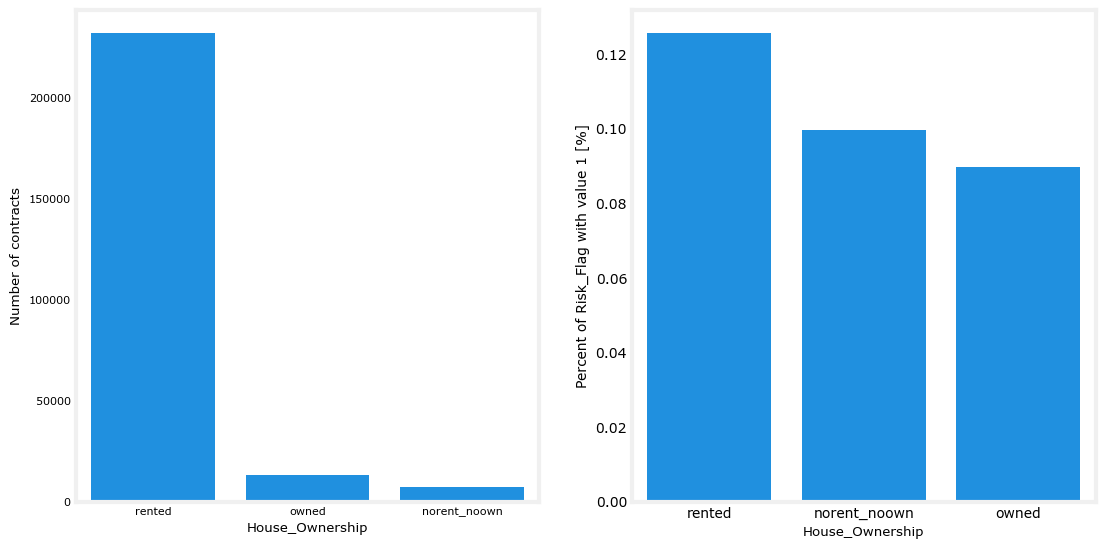

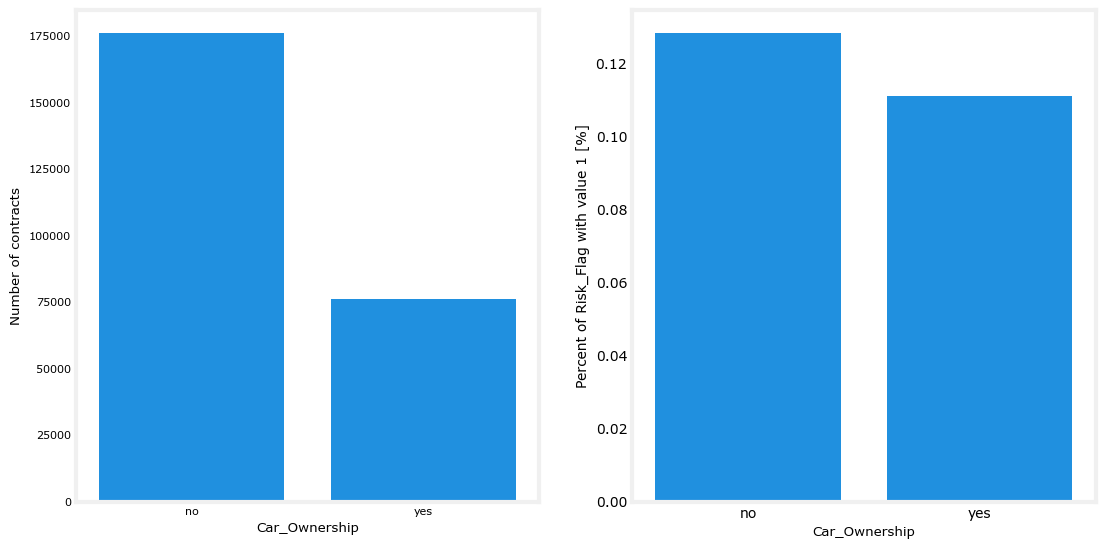

C:\Users\26091\AppData\Local\Temp\ipykernel_14096\3242358108.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)
C:\Users\26091\AppData\Local\Temp\ipykernel_14096\3242358108.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)


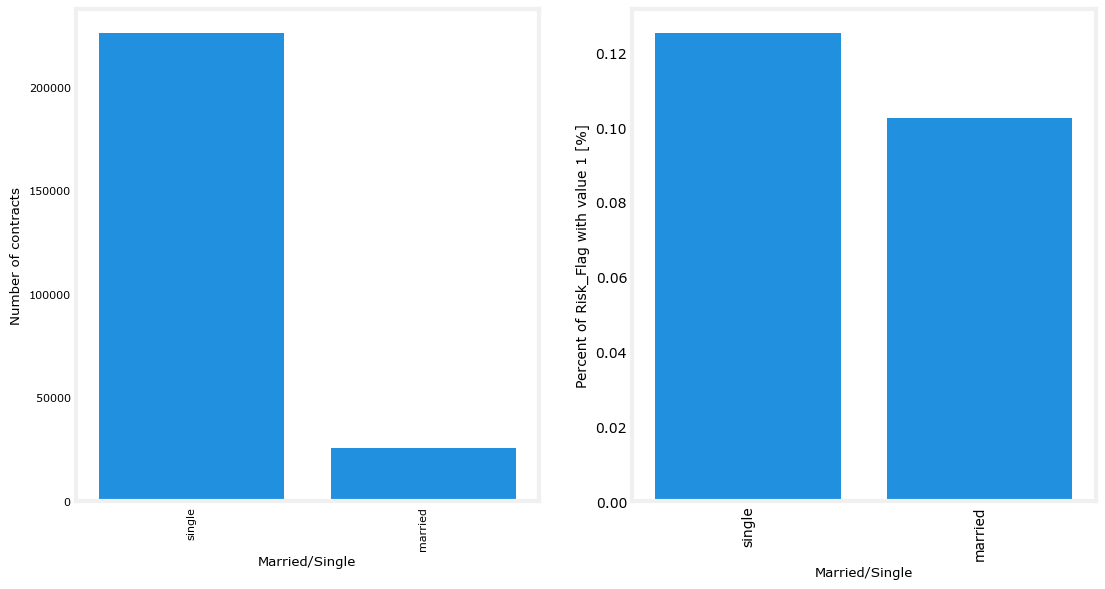

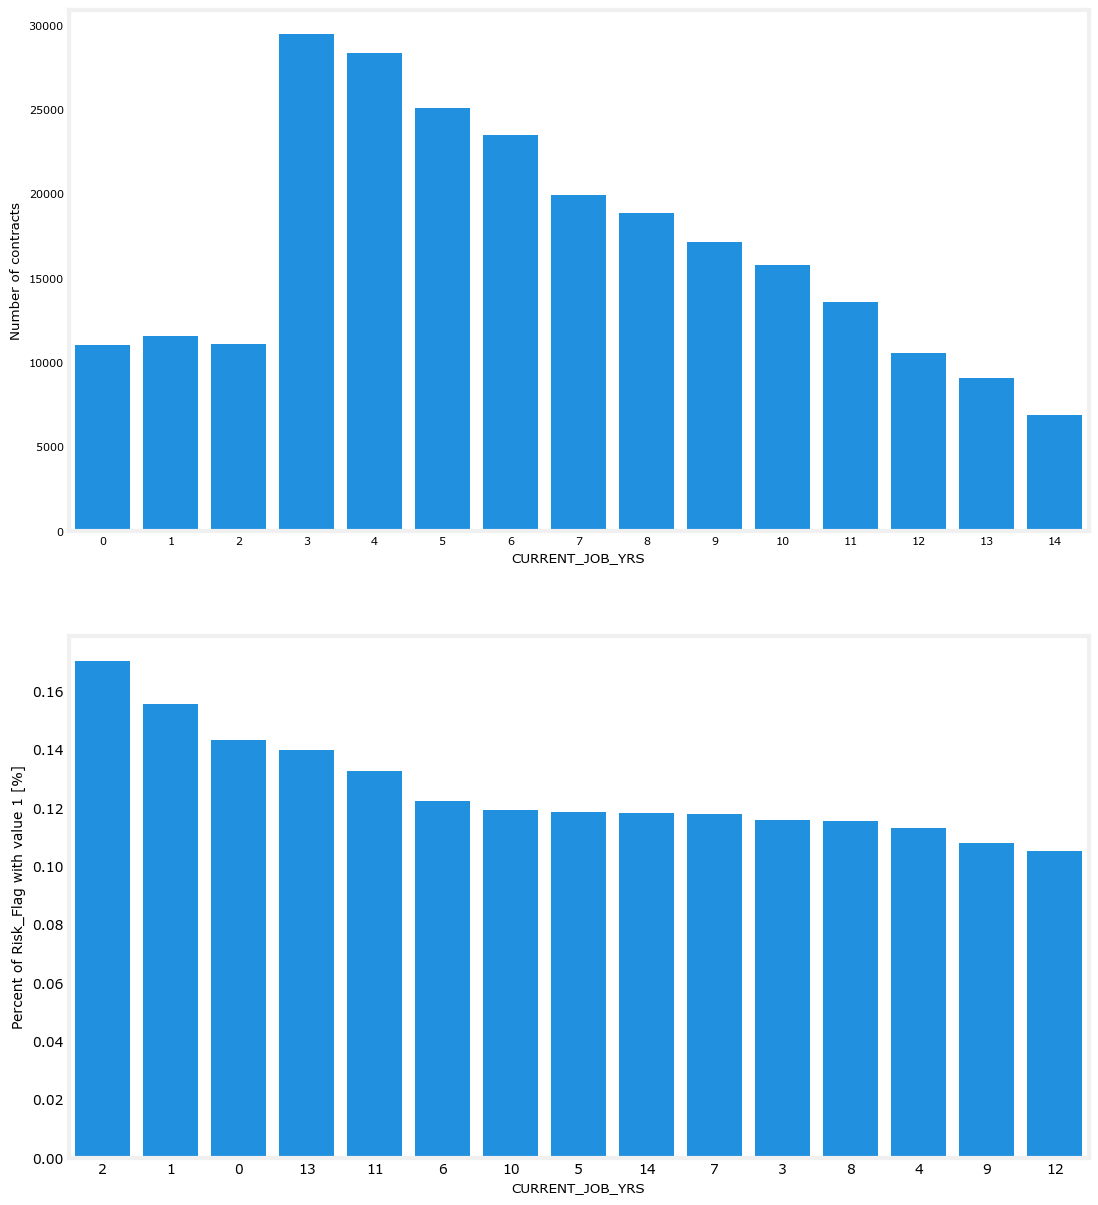

In [6]:
#年龄的影响
data['Age_category'] = '20-25'
for i in range(len(data)):
    for j in range(20,80,5):
        if data.loc[i,'Age']<=j:
            data.loc[i,'Age_category'] = f'{j}-{j+5}'
            break
plot_stats('Age_category',False,False)
#2.收入的影响
# plot_stats('Income',False,False)
#3.房车的影响
plot_stats('House_Ownership')
plot_stats('Car_Ownership')
#4.婚否的影响
plot_stats('Married/Single',True, True)
#5.工作经验的影响
plot_stats('CURRENT_JOB_YRS',False,False)
